<a href="https://colab.research.google.com/github/minseokey/Data_Science/blob/main/DataScience05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])


In [ ]:
W = torch.randn((1,1),requires_grad = True) # 안에다가 차원을 나타내준다 지금은 1차원이니까 1,1
b = torch.randn((1,1),requires_grad = True)

lr = 1.0

optim = torch.optim.SGD([W,b],lr = 1.0)

for epoch in range(1000):
  W.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train,W) + b)
  cost = torch.mean(-y_train * torch.log(h)-(1 - y_train) * torch.log(1 - h))

  optim.zero_grad() # 기울기값 초기화
  # with torch.no_grad():
  #   W.grad = torch.FloatTensor([[0]])
  #   b.grad = torch.FloatTensor([[0]])
  cost.backward() #r기울기계산
  optim.step() # 파라미터 업데이트(optimiser)

  # with torch.no_grad(): 여가선 그래프 그리지마
  #   파라미터업데이트
  #   W = W-lr*W.grad
  #   b = b-lr*b.grad

  if epoch %100 == 0:
    print(f"W:{W.item()}, b:{b.item()}, cost:{cost.item()}") 

W:-0.6408638954162598, b:0.05635973811149597, cost:1.05049467086792
W:-1.458793044090271, b:4.430042266845703, cost:0.4197414815425873
W:-1.9026304483413696, b:5.786503314971924, cost:0.39857593178749084
W:-2.1771421432495117, b:6.618072509765625, cost:0.3907555341720581
W:-2.369377613067627, b:7.197767734527588, cost:0.3869747221469879
W:-2.5121781826019287, b:7.627193450927734, cost:0.3849048614501953
W:-2.6219890117645264, b:7.956792831420898, cost:0.383686900138855
W:-2.7083590030670166, b:8.21568489074707, cost:0.38293612003326416
W:-2.7773683071136475, b:8.422332763671875, cost:0.382457971572876
W:-2.833148956298828, b:8.589240074157715, cost:0.3821462094783783


In [ ]:
with torch.no_grad():
  x_test = torch.FloatTensor([[4.5],[1.1]])
  y_test = torch.sigmoid(torch.mm(x_test, W) + b)
  y_test[y_test>0.5 ] = 1
  y_test[y_test <= 0.5] = 0
  print(y_test)


tensor([[0.],
        [1.]])


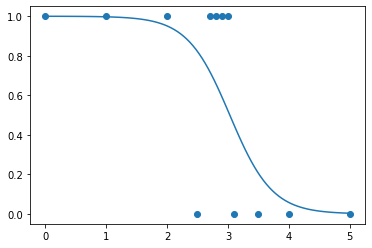

In [ ]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

x_tmp = torch.linspace(0,5,100).unsqueeze(1)
y_tmp = torch.sigmoid(torch.mm(x_tmp,W)+b)
plt.scatter(x_train,y_train)
plt.plot(x_tmp,y_tmp)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름에 주의!

model = LogisticRegression(penalty='none') # penalty (or regularization)은 추후 설명
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5],[1.1]]
res = model.predict(x_test)
print(res)

[[-3.10385806]] [9.39776831]
[0 1]
